In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [11]:
data_path = os.path.join("..", "data", "iris.csv")
df_pre = pd.read_csv(data_path, header = None)
df = df_pre.sample(frac = 1)

In [12]:
dataset = df.values
X = dataset[:, 0:4].astype(float)
Y_obj = dataset[:, 4]

In [13]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

In [14]:
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [15]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [16]:
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

In [17]:
# 모델 저장 조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.keras"
checkpinter = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)

In [18]:
# 모델 실행
history = model.fit(X, Y_encoded, validation_split = 0.33, epochs = 300, batch_size = 0, callbacks = [early_stopping_callback, checkpinter])

Epoch 1/300
1/4 [======>.......................] - ETA: 0s - loss: 3.1115 - accuracy: 0.4062
Epoch 1: val_loss improved from inf to 3.04449, saving model to ./model\01-3.0445.keras
4/4 [==============================] - 0s 45ms/step - loss: 3.3676 - accuracy: 0.3000 - val_loss: 3.0445 - val_accuracy: 0.2400
Epoch 2/300
1/4 [======>.......................] - ETA: 0s - loss: 2.8998 - accuracy: 0.2500
Epoch 2: val_loss improved from 3.04449 to 2.84226, saving model to ./model\02-2.8423.keras
4/4 [==============================] - 0s 13ms/step - loss: 3.1033 - accuracy: 0.1800 - val_loss: 2.8423 - val_accuracy: 0.1000
Epoch 3/300
1/4 [======>.......................] - ETA: 0s - loss: 2.8408 - accuracy: 0.0625
Epoch 3: val_loss improved from 2.84226 to 2.65108, saving model to ./model\03-2.6511.keras
4/4 [==============================] - 0s 13ms/step - loss: 2.8748 - accuracy: 0.0500 - val_loss: 2.6511 - val_accuracy: 0.0000e+00
Epoch 4/300
1/4 [======>.......................] - ETA: 0s - 

In [19]:
y_vacc = history.history['val_accuracy']
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']

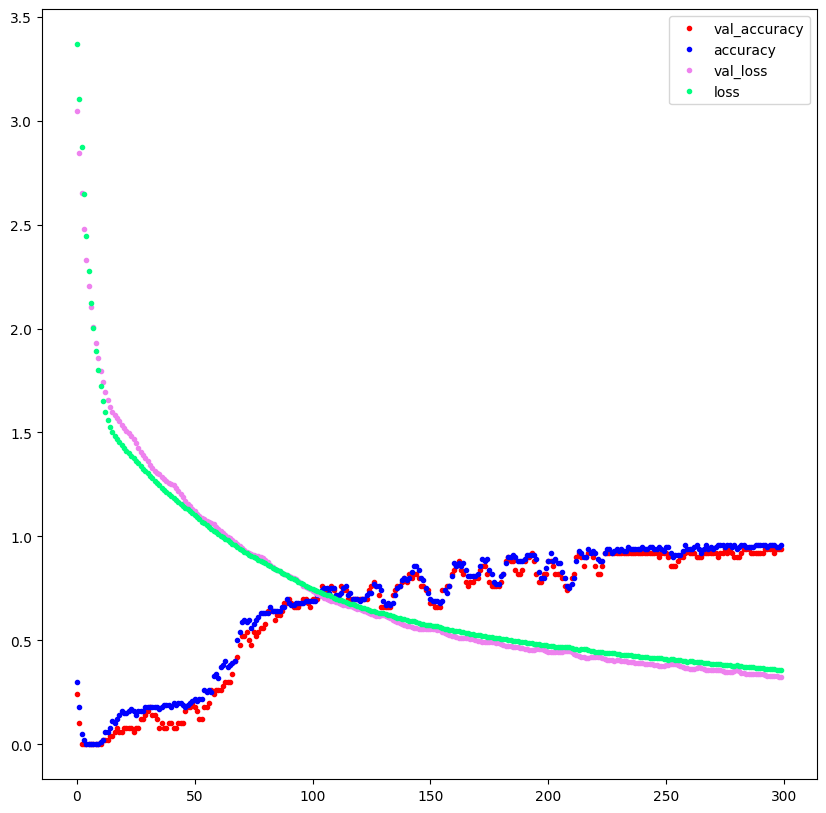

In [20]:
x_len = np.arange(len(y_acc))
plt.figure(figsize = (10, 10))
plt.plot(x_len, y_vacc, "o", c = "red", markersize = 3, label = 'val_accuracy')
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3, label = 'accuracy')
plt.plot(x_len, y_vloss, "o", c = "violet", markersize = 3, label = 'val_loss')
plt.plot(x_len, y_loss, "o", c = "springgreen", markersize = 3, label = 'loss')
plt.legend()
plt.show()